In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

In [22]:
# Загрузка iris
iris = load_iris()

X = iris.data[:, 2:4]
y = iris.target

In [23]:
# Обучаем модель
model = LogisticRegression(max_iter=200)
model.fit(X, y)

LogisticRegression(max_iter=200)

In [24]:
# Задаем границы области и создаем сетку
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

In [25]:
# Предсказываем класс для каждой точки сетки
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

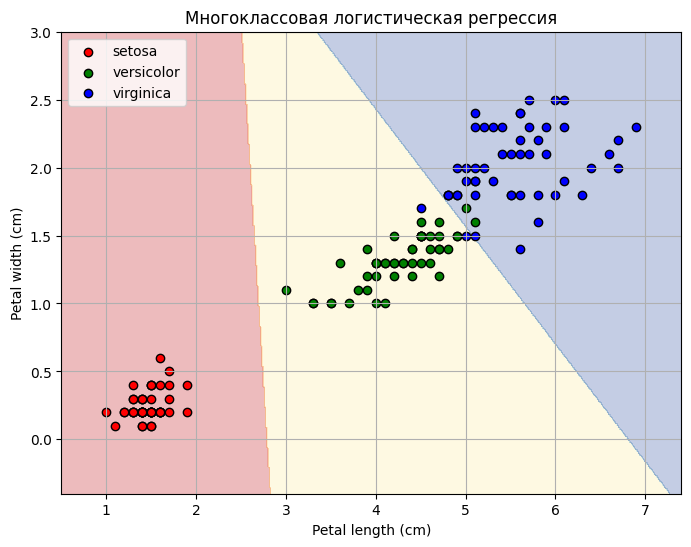

In [27]:
# Визуализация границ решений и точек
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)

# Реальные точки
colors = ['red', 'green', 'blue']
for i in range(3):
    plt.scatter(X[y == i, 0], X[y == i, 1],
                c=colors[i], label=iris.target_names[i], edgecolor='k')

# Подписи
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Многоклассовая логистическая регрессия')
plt.legend()
plt.grid(True)
plt.show()